In [1]:
import pandas as pd

In [15]:
df=pd.read_csv("/content/weight-height.csv")

In [16]:
pwd()

'/content'

In [17]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [18]:
import matplotlib.pyplot as plt

In [19]:
df0=df[df.Gender=='Male']
df1=df[df.Gender=='Female']

In [20]:
df0

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905910


In [21]:
df1

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


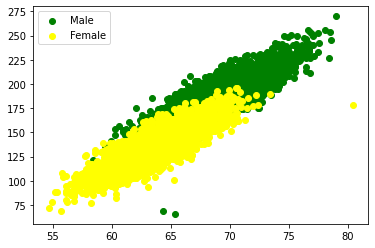

In [25]:
plt.scatter(df0['Height'],df0['Weight'],color='green',label='Male')
plt.scatter(df1['Height'],df1['Weight'],color='yellow',label='Female')
plt.legend()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [30]:
df['Gender']=le.fit_transform(df.Gender)

In [31]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [33]:
x=df.drop('Gender',axis=1)
x

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [35]:
y=df.Gender
y

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNN=KNeighborsClassifier()

In [41]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [42]:
KNN.score(xtrain,ytrain)

0.9284600997506235

In [43]:
KNN.score(xtest,ytest)

0.9121084618980833

In [45]:
pr_KNN=KNN.predict(xtest)
pr_KNN

array([0, 1, 1, ..., 0, 1, 1])

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(ytest,pr_KNN)

0.9121084618980833

Hyper-parameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
import numpy as np

In [57]:
n_neighbors = [int(x) for x in np.linspace(start = 20, stop = 300, num = 20)]
weights = ['uniform', 'distance']

In [60]:
grids={'n_neighbors':n_neighbors,
   'weights':weights   
    
}


In [61]:
knn2=RandomizedSearchCV(KNN,grids,n_iter=100,cv=3)

In [65]:
knn2.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'n_neighbors': [20, 34, 49, 64, 78, 93,
                                                        108, 123, 137, 152, 167,
                                                        182, 196, 211, 226, 241,
                                                        255, 270, 285, 300],
                                        'weights': ['uniform', 'distance']})

In [67]:
knn2.best_params_

{'n_neighbors': 34, 'weights': 'uniform'}

In [68]:
knn2.best_estimator_

KNeighborsClassifier(n_neighbors=34)

In [69]:
knn2.score(xtrain,ytrain)

0.9173940149625935

In [70]:
knn2.score(xtest,ytest)

0.9219261337073399

In [71]:
knn2.cv_results_

{'mean_fit_time': array([0.01375095, 0.01239896, 0.01105213, 0.00645566, 0.00927377,
        0.00838065, 0.01108416, 0.01107581, 0.00621374, 0.00624935,
        0.00670743, 0.01210276, 0.01060033, 0.01906157, 0.01063871,
        0.00640829, 0.00646011, 0.00886369, 0.00876085, 0.00639796,
        0.00653799, 0.00879979, 0.00654022, 0.00697915, 0.00888554,
        0.0111142 , 0.00644851, 0.00656605, 0.00649873, 0.00742428,
        0.00660221, 0.00668987, 0.00659347, 0.00643762, 0.00715653,
        0.00647934, 0.00653537, 0.00702373, 0.00671832, 0.00672841]),
 'mean_score_time': array([0.15544891, 0.03938548, 0.20658922, 0.02893813, 0.13117584,
        0.05656989, 0.13782461, 0.0638442 , 0.21030521, 0.05988264,
        0.25227396, 0.0879341 , 0.26359487, 0.11447382, 0.20547247,
        0.11489781, 0.24856305, 0.14925257, 0.23903004, 0.10813189,
        0.20749172, 0.13507978, 0.22899413, 0.11471256, 0.22973108,
        0.15353068, 0.24369796, 0.14369861, 0.25111429, 0.16515827,
        0.

In [72]:
results=pd.DataFrame(knn2.cv_results_)

In [73]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013751,0.005102,0.155449,0.046115,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.910238,0.915381,0.918148,0.914589,0.003277,2
1,0.012399,0.004444,0.039385,0.005939,distance,20,"{'weights': 'distance', 'n_neighbors': 20}",0.904628,0.909771,0.914406,0.909602,0.003994,21
2,0.011052,0.003286,0.206589,0.037092,uniform,34,"{'weights': 'uniform', 'n_neighbors': 34}",0.909771,0.918186,0.920486,0.916148,0.004606,1
3,0.006456,0.000158,0.028938,0.003283,distance,34,"{'weights': 'distance', 'n_neighbors': 34}",0.907901,0.912108,0.917680,0.912563,0.004005,6
4,0.009274,0.004390,0.131176,0.008260,uniform,49,"{'weights': 'uniform', 'n_neighbors': 49}",0.907901,0.913043,0.921890,0.914278,0.005777,3
5,0.008381,0.003090,0.056570,0.016817,distance,49,"{'weights': 'distance', 'n_neighbors': 49}",0.906031,0.911173,0.920019,0.912408,0.005777,7
6,0.011084,0.006486,0.137825,0.012987,uniform,64,"{'weights': 'uniform', 'n_neighbors': 64}",0.907433,0.909771,0.921422,0.912875,0.006118,4
7,0.011076,0.003697,0.063844,0.010861,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.906498,0.911641,0.920486,0.912875,0.005777,5
8,0.006214,0.000345,0.210305,0.027537,uniform,78,"{'weights': 'uniform', 'n_neighbors': 78}",0.906966,0.909771,0.919551,0.912096,0.005394,8
9,0.006249,0.000276,0.059883,0.007695,distance,78,"{'weights': 'distance', 'n_neighbors': 78}",0.906031,0.909771,0.919551,0.911784,0.005700,10


In [75]:
knn3=knn2.best_estimator_

In [76]:
knn3.score(xtest,ytest)

0.9219261337073399